#Data Science Project: Ecommerce Churn Analysis

##Understanding the problem: Why do customers churn?
Customer churning is one of the biggest problems in the telecom industry. Acquiring a new customer is far more expensive than retaining one. Companies often struggle with the risk of customers leaving. Our goal is to predict customers who are likely to leave so that the companies take proactive measures in order to retain them.

##Business Impact
* Losing customers leads to revenue loss.
* Retaining a customer from leaving is cheaper than aquiring a newer one.
* A machine learning model can help predict the churning of customer and help businesses with retention strategies.

##Insights:


###Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

###Load the dataset

In [3]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
validate_df = pd.read_csv('validation.csv')

In [6]:
print(train_df.shape)
print(test_df.shape)
print(validate_df.shape)

(4225, 52)
(1409, 52)
(1409, 52)


In [4]:
train_df.head()

,Age,Avg Monthly GB Download,Avg Monthly Long Distance Charges,Churn Category,Churn Reason,Churn Score,City,CLTV,Contract,Country,...,Tenure in Months,Total Charges,Total Extra Data Charges,Total Long Distance Charges,Total Refunds,Total Revenue,Under 30,Unlimited Data,Zip Code,Churn
0,72,4,19.44,NaN,NaN,51,San Mateo,4849,Two Year,United States,...,25,2191.15,0,486.00,0.0,2677.15,0,1,94403,0
1,27,59,45.62,NaN,NaN,27,Sutter Creek,3715,Month-to-Month,United States,...,35,3418.20,0,1596.70,0.0,5014.90,1,1,95685,0
2,59,0,16.07,NaN,NaN,59,Santa Cruz,5092,Month-to-Month,United States,...,46,851.20,0,739.22,0.0,1590.42,0,0,95064,0
3,25,27,0.00,NaN,NaN,49,Brea,2068,One Year,United States,...,27,1246.40,30,0.00,0.0,1276.40,1,0,92823,0
4,31,21,17.22,Dissatisfaction,Network reliability,88,San Jose,4026,One Year,United States,...,58,3563.80,0,998.76,0.0,4562.56,0,1,95117,1


In [5]:
test_df.head()

,Age,Avg Monthly GB Download,Avg Monthly Long Distance Charges,Churn Category,Churn Reason,Churn Score,City,CLTV,Contract,Country,...,Tenure in Months,Total Charges,Total Extra Data Charges,Total Long Distance Charges,Total Refunds,Total Revenue,Under 30,Unlimited Data,Zip Code,Churn
0,39,29,18.91,NaN,NaN,54,Bradley,3334,One Year,United States,...,7,477.05,0,132.37,0.0,609.42,0,1,93426,0
1,75,22,33.48,NaN,NaN,54,Lakeshore,2455,Month-to-Month,United States,...,30,3181.80,0,1004.40,0.0,4186.20,0,1,93634,0
2,67,14,9.96,NaN,NaN,26,Lompoc,5011,Two Year,United States,...,71,7904.25,0,707.16,0.0,8611.41,0,1,93437,0
3,47,7,34.64,NaN,NaN,29,Echo Lake,2452,Month-to-Month,United States,...,9,593.85,0,311.76,0.0,905.61,0,1,95721,0
4,21,0,10.49,NaN,NaN,23,Lancaster,4129,One Year,United States,...,25,507.90,0,262.25,0.0,770.15,1,0,93536,0


In [6]:
validate_df.head()

,Age,Avg Monthly GB Download,Avg Monthly Long Distance Charges,Churn Category,Churn Reason,Churn Score,City,CLTV,Contract,Country,...,Tenure in Months,Total Charges,Total Extra Data Charges,Total Long Distance Charges,Total Refunds,Total Revenue,Under 30,Unlimited Data,Zip Code,Churn
0,43,4,29.19,NaN,NaN,58,Indio,5614,Month-to-Month,United States,...,41,3990.60,0,1196.79,0.0,5187.39,0,1,92203,0
1,59,19,0.00,NaN,NaN,23,Santa Maria,6300,One Year,United States,...,59,1980.30,0,0.00,0.0,1980.30,0,1,93455,0
2,46,6,26.81,NaN,NaN,39,Oakhurst,5135,Two Year,United States,...,63,6330.40,0,1689.03,0.0,8019.43,0,1,93644,0
3,61,6,41.79,NaN,NaN,39,San Francisco,2051,One Year,United States,...,19,1231.85,60,794.01,0.0,2085.86,0,0,94104,0
4,50,0,40.25,NaN,NaN,57,Salinas,5983,Month-to-Month,United States,...,2,62.00,0,80.50,0.0,142.50,0,0,93906,0


In [11]:
train_df.columns

Index(['Age', 'Avg Monthly GB Download', 'Avg Monthly Long Distance Charges',
       'Churn Category', 'Churn Reason', 'Churn Score', 'City', 'CLTV',
       'Contract', 'Country', 'Customer ID', 'Customer Status', 'Dependents',
       'Device Protection Plan', 'Gender', 'Internet Service', 'Internet Type',
       'Lat Long', 'Latitude', 'Longitude', 'Married', 'Monthly Charge',
       'Multiple Lines', 'Number of Dependents', 'Number of Referrals',
       'Offer', 'Online Backup', 'Online Security', 'Paperless Billing',
       'Partner', 'Payment Method', 'Phone Service', 'Population',
       'Premium Tech Support', 'Quarter', 'Referred a Friend',
       'Satisfaction Score', 'Senior Citizen', 'State', 'Streaming Movies',
       'Streaming Music', 'Streaming TV', 'Tenure in Months', 'Total Charges',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Refunds', 'Total Revenue', 'Under 30', 'Unlimited Data',
       'Zip Code', 'Churn'],
      dtype='object')

In [8]:
train_df['Churn'].describe()

,Churn
count,4225.000000
mean,0.265325
std,0.441559
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


##Data Cleaning

###Data cleaning train dataset

In [ ]:
train_df.shape

(4225, 52)

In [ ]:
train_df.size

219700

In [ ]:
train_df = train_df.drop(['Latitude', 'Longitude','Customer ID','Zip Code','Offer','CLTV','Churn Reason','Churn Category','Total Long Distance Charges', 'Country', 'City'], axis=1)


In [ ]:
train_df.columns

Index(['Age', 'Avg Monthly GB Download', 'Avg Monthly Long Distance Charges',
       'Churn Score', 'Contract', 'Customer Status', 'Dependents',
       'Device Protection Plan', 'Gender', 'Internet Service', 'Internet Type',
       'Lat Long', 'Married', 'Monthly Charge', 'Multiple Lines',
       'Number of Dependents', 'Number of Referrals', 'Online Backup',
       'Online Security', 'Paperless Billing', 'Partner', 'Payment Method',
       'Phone Service', 'Population', 'Premium Tech Support', 'Quarter',
       'Referred a Friend', 'Satisfaction Score', 'Senior Citizen', 'State',
       'Streaming Movies', 'Streaming Music', 'Streaming TV',
       'Tenure in Months', 'Total Charges', 'Total Extra Data Charges',
       'Total Refunds', 'Total Revenue', 'Under 30', 'Unlimited Data',
       'Churn'],
      dtype='object')

In [ ]:
train_df.isnull().sum()

,0
Age,0
Avg Monthly GB Download,0
Avg Monthly Long Distance Charges,0
Churn Score,0
Contract,0
Customer Status,0
Dependents,0
Device Protection Plan,0
Gender,0
Internet Service,0


In [ ]:
train_df.describe()

,Age,Avg Monthly GB Download,Avg Monthly Long Distance Charges,Churn Score,Dependents,Device Protection Plan,Internet Service,Married,Monthly Charge,Multiple Lines,...,Streaming Music,Streaming TV,Tenure in Months,Total Charges,Total Extra Data Charges,Total Refunds,Total Revenue,Under 30,Unlimited Data,Churn
count,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,...,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000
mean,46.451124,20.740828,22.766963,58.281183,0.233136,0.346982,0.790296,0.483314,64.906462,0.416095,...,0.349586,0.383669,32.681893,2306.078107,6.965680,1.953846,3065.809082,0.200000,0.677870,0.265325
std,16.731518,20.366105,15.429992,21.197931,0.422878,0.476066,0.407146,0.499781,29.926014,0.492968,...,0.476896,0.486336,24.621041,2271.448881,25.250169,7.814374,2884.817379,0.400047,0.467348,0.441559
min,19.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,...,0.000000,0.000000,1.000000,18.800000,0.000000,0.000000,21.360000,0.000000,0.000000,0.000000
25%,32.000000,4.000000,9.050000,40.000000,0.000000,0.000000,1.000000,0.000000,38.550000,0.000000,...,0.000000,0.000000,9.000000,401.500000,0.000000,0.000000,592.750000,0.000000,0.000000,0.000000
50%,46.000000,17.000000,22.570000,61.000000,0.000000,0.000000,1.000000,0.000000,70.200000,0.000000,...,0.000000,0.000000,30.000000,1424.600000,0.000000,0.000000,2151.470000,0.000000,1.000000,0.000000
75%,60.000000,27.000000,36.170000,75.000000,0.000000,1.000000,1.000000,1.000000,89.750000,1.000000,...,1.000000,1.000000,56.000000,3846.750000,0.000000,0.000000,4845.750000,0.000000,1.000000,1.000000
max,80.000000,85.000000,49.990000,96.000000,1.000000,1.000000,1.000000,1.000000,118.750000,1.000000,...,1.000000,1.000000,72.000000,8672.450000,150.000000,49.790000,11979.340000,1.000000,1.000000,1.000000


In [ ]:
train_df["Internet Type"].fillna(0, inplace=True)

<ipython-input-526-4c6136a13b1f>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df["Internet Type"].fillna(0, inplace=True)


###Data cleaning test dataset

In [ ]:
test_df.head()

,Age,Avg Monthly GB Download,Avg Monthly Long Distance Charges,Churn Category,Churn Reason,Churn Score,City,CLTV,Contract,Country,...,Tenure in Months,Total Charges,Total Extra Data Charges,Total Long Distance Charges,Total Refunds,Total Revenue,Under 30,Unlimited Data,Zip Code,Churn
0,39,29,18.91,NaN,NaN,54,Bradley,3334,One Year,United States,...,7,477.05,0,132.37,0.0,609.42,0,1,93426,0
1,75,22,33.48,NaN,NaN,54,Lakeshore,2455,Month-to-Month,United States,...,30,3181.80,0,1004.40,0.0,4186.20,0,1,93634,0
2,67,14,9.96,NaN,NaN,26,Lompoc,5011,Two Year,United States,...,71,7904.25,0,707.16,0.0,8611.41,0,1,93437,0
3,47,7,34.64,NaN,NaN,29,Echo Lake,2452,Month-to-Month,United States,...,9,593.85,0,311.76,0.0,905.61,0,1,95721,0
4,21,0,10.49,NaN,NaN,23,Lancaster,4129,One Year,United States,...,25,507.90,0,262.25,0.0,770.15,1,0,93536,0


In [ ]:
test_df.shape

(1409, 52)

In [ ]:
test_df.size

73268

In [ ]:
test_df.isna().sum()

,0
Age,0
Avg Monthly GB Download,0
Avg Monthly Long Distance Charges,0
Churn Category,1035
Churn Reason,1035
Churn Score,0
City,0
CLTV,0
Contract,0
Country,0


In [ ]:
test_df = test_df.drop(['Latitude', 'Longitude','Customer ID','Zip Code','Offer','CLTV','Churn Reason','Churn Category','Total Long Distance Charges', 'Country', 'City'], axis=1)


In [ ]:
test_df.columns

Index(['Age', 'Avg Monthly GB Download', 'Avg Monthly Long Distance Charges',
       'Churn Score', 'Contract', 'Customer Status', 'Dependents',
       'Device Protection Plan', 'Gender', 'Internet Service', 'Internet Type',
       'Lat Long', 'Married', 'Monthly Charge', 'Multiple Lines',
       'Number of Dependents', 'Number of Referrals', 'Online Backup',
       'Online Security', 'Paperless Billing', 'Partner', 'Payment Method',
       'Phone Service', 'Population', 'Premium Tech Support', 'Quarter',
       'Referred a Friend', 'Satisfaction Score', 'Senior Citizen', 'State',
       'Streaming Movies', 'Streaming Music', 'Streaming TV',
       'Tenure in Months', 'Total Charges', 'Total Extra Data Charges',
       'Total Refunds', 'Total Revenue', 'Under 30', 'Unlimited Data',
       'Churn'],
      dtype='object')

###Data cleaning in Validation dataset

In [ ]:
validate_df.head()

,Age,Avg Monthly GB Download,Avg Monthly Long Distance Charges,Churn Category,Churn Reason,Churn Score,City,CLTV,Contract,Country,...,Tenure in Months,Total Charges,Total Extra Data Charges,Total Long Distance Charges,Total Refunds,Total Revenue,Under 30,Unlimited Data,Zip Code,Churn
0,43,4,29.19,NaN,NaN,58,Indio,5614,Month-to-Month,United States,...,41,3990.60,0,1196.79,0.0,5187.39,0,1,92203,0
1,59,19,0.00,NaN,NaN,23,Santa Maria,6300,One Year,United States,...,59,1980.30,0,0.00,0.0,1980.30,0,1,93455,0
2,46,6,26.81,NaN,NaN,39,Oakhurst,5135,Two Year,United States,...,63,6330.40,0,1689.03,0.0,8019.43,0,1,93644,0
3,61,6,41.79,NaN,NaN,39,San Francisco,2051,One Year,United States,...,19,1231.85,60,794.01,0.0,2085.86,0,0,94104,0
4,50,0,40.25,NaN,NaN,57,Salinas,5983,Month-to-Month,United States,...,2,62.00,0,80.50,0.0,142.50,0,0,93906,0


In [ ]:
validate_df.shape

(1409, 52)

In [ ]:
validate_df.size

73268

In [ ]:
validate_df = validate_df.drop(['Latitude', 'Longitude','Customer ID','Zip Code','City','Country','Offer','CLTV','Churn Reason','Churn Category','Total Long Distance Charges'], axis=1)


In [ ]:
validate_df.columns

Index(['Age', 'Avg Monthly GB Download', 'Avg Monthly Long Distance Charges',
       'Churn Score', 'Contract', 'Customer Status', 'Dependents',
       'Device Protection Plan', 'Gender', 'Internet Service', 'Internet Type',
       'Lat Long', 'Married', 'Monthly Charge', 'Multiple Lines',
       'Number of Dependents', 'Number of Referrals', 'Online Backup',
       'Online Security', 'Paperless Billing', 'Partner', 'Payment Method',
       'Phone Service', 'Population', 'Premium Tech Support', 'Quarter',
       'Referred a Friend', 'Satisfaction Score', 'Senior Citizen', 'State',
       'Streaming Movies', 'Streaming Music', 'Streaming TV',
       'Tenure in Months', 'Total Charges', 'Total Extra Data Charges',
       'Total Refunds', 'Total Revenue', 'Under 30', 'Unlimited Data',
       'Churn'],
      dtype='object')

##Data visualization

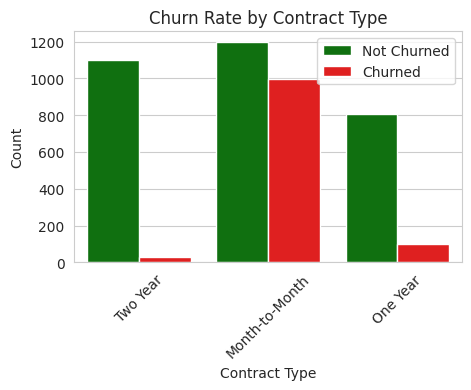

In [10]:
sns.set_style("whitegrid")

# 1. Churn Rate by Contract Type
plt.figure(figsize=(5, 3))
sns.countplot(x="Contract", hue="Churn", data=train_df, palette=["green", "red"])
plt.title("Churn Rate by Contract Type")
plt.xlabel("Contract Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(["Not Churned", "Churned"])
plt.show()


In [ ]:
# 2. Churn Rate by Payment Method
plt.figure(figsize=(5, 3))
sns.countplot(x="Payment Method", hue="Churn", data=train_df, palette=["green", "red"])
plt.title("Churn Rate by Payment Method")
plt.xlabel("Payment Method")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(["Not Churned", "Churned"])
plt.show()

In [ ]:
# 3. Churn Rate by Internet Type
plt.figure(figsize=(5, 3))
sns.countplot(x="Internet Type", hue="Churn", data=train_df, palette=["green", "red"])
plt.title("Churn Rate by Internet Type")
plt.xlabel("Internet Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(["Not Churned", "Churned"])
plt.show()

In [14]:
# 4. Tenure vs Churn
plt.figure(figsize=(5, 3))
sns.boxplot(x='Tenure in Months', y='Churn')

ValueError: Could not interpret value `Tenure in Months` for `x`. Value is a string, but `data` was not passed.

<Figure size 500x300 with 0 Axes>

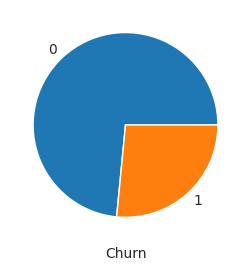

In [ ]:
churn_counts = train_df.Churn.value_counts()

plt.figure(figsize=(5,3))
plt.xlabel("Churn")
plt.pie(churn_counts, labels=churn_counts.index)
plt.show()

##One hot encoding

In [ ]:
train_df1=pd.get_dummies(data=train_df,
                         columns= ['Customer Status', 'Gender', 'Contract',
                                  'Internet Type', 'Lat Long', 'Payment Method', 'Quarter', 'State',
                                  'Customer Status', 'Gender', 'Internet Type', 'Lat Long',
                                  'Payment Method', 'Quarter', 'State'],
                        drop_first=True)
train_df1 = train_df1.replace({True: 1, False: 0})
test_df1=pd.get_dummies(data=test_df,
                         columns=['Customer Status', 'Gender',
                                  'Internet Type', 'Lat Long', 'Payment Method', 'Quarter', 'State', 'Customer Status',
                                  'Gender', 'Internet Type', 'Lat Long',
                                  'Payment Method', 'Quarter', 'State', 'Contract'],
                        drop_first=True)
test_df1 = test_df1.replace({True: 1, False: 0})
validate_df1=pd.get_dummies(data=validate_df,
                         columns=['Customer Status', 'Gender',
                                  'Internet Type', 'Lat Long', 'Payment Method', 'Quarter', 'State',
                                  'Customer Status', 'Gender', 'Internet Type', 'Lat Long',
                                  'Payment Method', 'Quarter', 'State', 'Contract'],
                        drop_first=True)
validate_df1 = validate_df1.replace({True: 1, False: 0})

<ipython-input-540-07b0a27bb2d6>:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_df1 = train_df1.replace({True: 1, False: 0})
<ipython-input-540-07b0a27bb2d6>:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_df1 = test_df1.replace({True: 1, False: 0})
<ipython-input-540-07b0a27bb2d6>:21: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_opti

In [ ]:
train_df1.columns

Index(['Age', 'Avg Monthly GB Download', 'Avg Monthly Long Distance Charges',
       'Churn Score', 'Dependents', 'Device Protection Plan',
       'Internet Service', 'Married', 'Monthly Charge', 'Multiple Lines',
       ...
       'Lat Long_41.816595, -122.948287', 'Lat Long_41.831901, -123.487478',
       'Lat Long_41.867908, -123.794144', 'Lat Long_41.924174, -123.260788',
       'Lat Long_41.932207, -120.135941', 'Lat Long_41.949216, -122.050062',
       'Lat Long_41.950683, -124.097094', 'Lat Long_41.962127, -122.527696',
       'Payment Method_Credit Card', 'Payment Method_Mailed Check'],
      dtype='object', length=3303)

In [ ]:
train_df1.head()

,Age,Avg Monthly GB Download,Avg Monthly Long Distance Charges,Churn Score,Dependents,Device Protection Plan,Internet Service,Married,Monthly Charge,Multiple Lines,...,"Lat Long_41.816595, -122.948287","Lat Long_41.831901, -123.487478","Lat Long_41.867908, -123.794144","Lat Long_41.924174, -123.260788","Lat Long_41.932207, -120.135941","Lat Long_41.949216, -122.050062","Lat Long_41.950683, -124.097094","Lat Long_41.962127, -122.527696",Payment Method_Credit Card,Payment Method_Mailed Check
0,72,4,19.44,51,0,1,1,1,88.40,0,...,0,0,0,0,0,0,0,0,0,0
1,27,59,45.62,27,0,1,1,0,95.50,1,...,0,0,0,0,0,0,0,0,0,0
2,59,0,16.07,59,0,0,0,1,19.60,0,...,0,0,0,0,0,0,0,0,0,0
3,25,27,0.00,49,0,1,1,1,45.85,0,...,0,0,0,0,0,0,0,0,1,0
4,31,21,17.22,88,0,1,1,1,60.30,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
test_df.head()

,Age,Avg Monthly GB Download,Avg Monthly Long Distance Charges,Churn Score,Contract,Customer Status,Dependents,Device Protection Plan,Gender,Internet Service,...,Streaming Music,Streaming TV,Tenure in Months,Total Charges,Total Extra Data Charges,Total Refunds,Total Revenue,Under 30,Unlimited Data,Churn
0,39,29,18.91,54,One Year,Stayed,1,1,Female,1,...,0,1,7,477.05,0,0.0,609.42,0,1,0
1,75,22,33.48,54,Month-to-Month,Stayed,0,1,Male,1,...,0,1,30,3181.80,0,0.0,4186.20,0,1,0
2,67,14,9.96,26,Two Year,Stayed,0,1,Female,1,...,1,1,71,7904.25,0,0.0,8611.41,0,1,0
3,47,7,34.64,29,Month-to-Month,Stayed,0,0,Male,1,...,0,1,9,593.85,0,0.0,905.61,0,1,0
4,21,0,10.49,23,One Year,Stayed,0,0,Female,0,...,0,0,25,507.90,0,0.0,770.15,1,0,0


##Model building

###Splitting the data

In [ ]:
train_df.columns

Index(['Age', 'Avg Monthly GB Download', 'Avg Monthly Long Distance Charges',
       'Churn Score', 'Contract', 'Customer Status', 'Dependents',
       'Device Protection Plan', 'Gender', 'Internet Service', 'Internet Type',
       'Lat Long', 'Married', 'Monthly Charge', 'Multiple Lines',
       'Number of Dependents', 'Number of Referrals', 'Online Backup',
       'Online Security', 'Paperless Billing', 'Partner', 'Payment Method',
       'Phone Service', 'Population', 'Premium Tech Support', 'Quarter',
       'Referred a Friend', 'Satisfaction Score', 'Senior Citizen', 'State',
       'Streaming Movies', 'Streaming Music', 'Streaming TV',
       'Tenure in Months', 'Total Charges', 'Total Extra Data Charges',
       'Total Refunds', 'Total Revenue', 'Under 30', 'Unlimited Data',
       'Churn'],
      dtype='object')

In [ ]:
X = train_df1.drop('Churn', axis=1)
y = train_df1['Churn']

In [ ]:
X.head()

,Age,Avg Monthly GB Download,Avg Monthly Long Distance Charges,Churn Score,Dependents,Device Protection Plan,Internet Service,Married,Monthly Charge,Multiple Lines,...,"Lat Long_41.816595, -122.948287","Lat Long_41.831901, -123.487478","Lat Long_41.867908, -123.794144","Lat Long_41.924174, -123.260788","Lat Long_41.932207, -120.135941","Lat Long_41.949216, -122.050062","Lat Long_41.950683, -124.097094","Lat Long_41.962127, -122.527696",Payment Method_Credit Card,Payment Method_Mailed Check
0,72,4,19.44,51,0,1,1,1,88.40,0,...,0,0,0,0,0,0,0,0,0,0
1,27,59,45.62,27,0,1,1,0,95.50,1,...,0,0,0,0,0,0,0,0,0,0
2,59,0,16.07,59,0,0,0,1,19.60,0,...,0,0,0,0,0,0,0,0,0,0
3,25,27,0.00,49,0,1,1,1,45.85,0,...,0,0,0,0,0,0,0,0,1,0
4,31,21,17.22,88,0,1,1,1,60.30,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
categorical_cols = X.select_dtypes(include=['object']).columns
categorical_cols

Index([], dtype='object')

In [ ]:
y.head()

,Churn
0,0
1,0
2,0
3,0
4,1


###Transforming the data

In [ ]:
train_df['Contract_Numeric'] = train_df['Contract'].map({'Month-to-month': 1, 'One year': 2, 'Two year': 3})
test_df['Contract_Numeric'] = test_df['Contract'].map({'Month-to-month': 1, 'One year': 2, 'Two year': 3})
validate_df['Contract_Numeric'] = validate_df['Contract'].map({'Month-to-month': 1, 'One year': 2, 'Two year': 3})

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

y_valid_pred = model.predict(X_valid)
accuracy = accuracy_score(y_valid, y_valid_pred)
print(f"Validation Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_valid, y_valid_pred))

Validation Accuracy: 0.96
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.98       611
           1       0.92      0.95      0.94       234

    accuracy                           0.96       845
   macro avg       0.95      0.96      0.96       845
weighted avg       0.97      0.96      0.96       845

